# Cordinate basis
> ### basis를 행열 F로 변환 시키면 본래 벡터는 그대로 인데 벡터의 성분만 달라진다.
> ### Old basis: {$\vec{e_1}, \vec{e_2}$},  New basis: {$\tilde{\vec{e_1}},\tilde{\vec{e_2}}$}
>> #### $\tilde{\vec{e_1}} = 2\vec{e_1} + 1\vec{e_2} \\
\tilde{\vec{e_2}} = \frac{-1}{2}\vec{e_1} + \frac{1}{4}\vec{e_2} \\
F = \begin{bmatrix} 2 & \frac{-1}{2} \\ 1 & \frac{1}{4}
\end{bmatrix}, \because \text{ firstly inner product}
$
>> #### 행열 F는 기본좌표계의 elements를 변환 시킨후 변환된 기본 좌표값을 넘겨준다.
>> #### 기본좌표계에서 vector v의 elements가 변환된 좌표를 기본축으로 했을때 어떻게 읽혀지는가 하고는 다른 것이다.



In [112]:
# matrix product 
##  firstly inner product (same element * same eleemnt)


# Tensors
> ## in an m-dimentional space, 
>> ### a tensor of rank n is
>>> ### a mathmatical object
>>>> ### that has n indices, $m^n$ components, and
>>>>> ### obeys certain transformation rules.
> ### transformation rules:
>> ### A tensor is an object that transformation like a tensor.
>> ### A tensor is an object that is invariant under a change of coordinate systems, with components that change according to a special set of mathmatical formulae.
> ### cordinate system change Intuition:
>> ### To specify component of rank-n tensor,
>> ### need:
>>> ### magnitude of componet
>>> ### n basis vecotors
>> ### Suppose N is a coordinate transformation operator applied to a tensor
>>> ### magnitude of tensor components will transform according to L,
>>> ### basis vectors will transform according to $L^{-1}$.
>>>> ### Effects of L and $L^{-1}$ cancle $\to$ same overall tensor as under old coordinates(but writtern differently).

> ## a collection of vectors and covectors combined together using the tensor product
>> ### Tensors as partial derivatives and gradients that transform with the Jacobian Matrix

In [113]:
#M = N.create_new('M',transformation=lambda x,y,z:(2*x+y,-1/2*x + 1/4*y,z))

## Matices
> ### representations of rank-2 tensors. Just arrays of numbers.
## Tensors
> ### required detailed specification and are invariant under change of coordinate system.

## [forward backward](https://www.youtube.com/watch?v=uPbBDToXjBw&list=PLJHszsWbB6hrkmmq57lX8BV-o-YIOFsiG&index=5)
> ### Old basis: {$\vec{e_1}, \vec{e_2}$},  New basis: {$\tilde{\vec{e_1}},\tilde{\vec{e_2}}$}
>> #### $\tilde{\vec{e_1}} = 2\vec{e_1} + 1\vec{e_2} \\
\tilde{\vec{e_2}} = \frac{-1}{2}\vec{e_1} + \frac{1}{4}\vec{e_2} \\
F = \begin{bmatrix} 2 & \frac{-1}{2} \\ 1 & \frac{1}{4}
\end{bmatrix}, \because \text{ firstly inner product}
$

Matrix([
[1.0],
[1.5],
[  0]])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
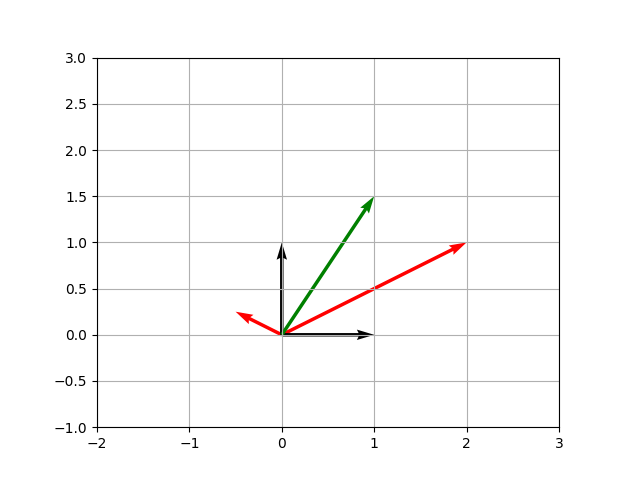

In [234]:
#### Basis.base_vector \vec{e_b}(B.i,B.j,B.k)

#### New.base_vector \vec{e_n}(N.i, N.j, N.k)

#--- wrt = with respect to ---

##### represent New basis wrt Basis #####

### (1,0) wrt New -> (?,?) wrt Basis

# N.i = x*B.i + y*B.j + z*B.k
# N.j = x*B.i + y*B.j + z*B.k
# N.k = x*B.i + y*B.j + z*B.k

## N.i = ( 2,    1,  0)
## N.j = (-1/2, 1/4, 0)
## N.k = ( 0,    0,  1)

# v = B(1, 1.5, 0) = B.i + 1.5*B.j 
# v = N(1, 2,   0) = N.i + 2*N.j
##############################
import sympy as sm
import sympy.vector
B = sm.vector.CoordSys3D('B')
N = sm.vector.CoordSys3D('N')

# asign(=) 을 표현 해준다로 해석
N.i = 2*B.i + 1*B.j
N.j = (-1/2)*B.i + 1/4*B.j
N.k = B.k
# N(1,2,0) wrt vector
N.i + 2*N.j
# 똑같은 하나의 벡터의 성분이 
#   새로운 좌표계값 기준으로 읽은 값이라면 기존 좌표값 기준으로 좌표값은?(Forward).
# 똑같은 하나의 벡터의 성분이 
#   기존 좌표값 기준으로 읽은 값이라면 새로운 좌표값 기준으로 좌표값은?(Backward)

# Foreward Matrix
Fm = sm.Matrix([[ 2, -1/2, 0 ],
                [ 1,  1/4, 0 ],
                [ 0,  0,   1 ]])

# N(1,2,0) wrt Matrix
Fm*(sm.Matrix([1,2,0]))

# N(1,2,0) wrt Matrix and vector
Bv = 1*B.i + 2*B.j
Fm*Bv.to_matrix(B) 

# Backward Matrix
Bm = Fm.inv()
Bm*sm.Matrix([1,1.5,0])

Fm*(sm.Matrix([1,2,0]))

#####################
import matplotlib.pyplot as plt
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot()
ax.set(xlim=(-2,3),ylim=(-1,3),aspect='equal')
ax.grid()
ax.quiver(0,0,2,1,units='xy',color='red',scale=1)
ax.quiver(0,0,-0.5,1/4,units='xy',color='red',scale=1)
ax.quiver(0,0,1,0,units='xy',scale=1)
ax.quiver(0,0,0,1,units='xy',scale=1)
ax.quiver(0,0,1,1.5,color='green',units='xy',scale=1)
Fm*Bv.to_matrix(B) 

In [242]:
M = sm.vector.CoordSys3D('M')
# represent Basis wrt M
B.i = 1/4*M.i + (-1)*M.j
B.j = 1/2*M.i + 2*M.j
B.k = M.k

# B(1, 1.5, 0) wrt vector
1*B.i + 1.5*B.j

# B(1, 1.5, 0) wrt Matrix
Bm = Fm.inv()
Bm * sm.Matrix( [1, 1.5, 0] )

# wrt matrix and vector
Mv = 1*M.i + 1.5*M.j
Bm * Mv.to_matrix(M)

Matrix([
[1.0],
[2.0],
[  0]])

>> #### $\vec{e_1} = 
\frac{1}{4}\tilde{\vec{e_1}} + -1\tilde{\vec{e_2}} \\
\vec{e_2} = \frac{1}{2}\tilde{\vec{e_1}} + 2\tilde{\vec{e_2}} \\
B = \begin{bmatrix} \frac{1}{4} & \frac{1}{2} \\ -1 & 2
\end{bmatrix}$
> ## $
FB = \begin{bmatrix} 2 & \frac{-1}{2} \\ 1 & \frac{1}{4} 
\end{bmatrix}
\begin{bmatrix} \frac{1}{4} & \frac{1}{2} \\ -1 & 2
\end{bmatrix}
= 
\begin{bmatrix} 1 & 0 \\ 0 & 1
\end{bmatrix} \\
B = F^{-1}
$ 

In [35]:
B = sm.Matrix([[sm.Rational(1,4),sm.Rational(1,2)],[-1,2]])
B

Matrix([
[1/4, 1/2],
[ -1,   2]])

In [12]:
import sympy as sm
F = sm.Matrix([[2,1],[sm.Rational(-1,2),sm.Rational(1,4)]])
B = sm.Matrix([[sm.Rational(1,4), -1], [sm.Rational(1,2),2]])
F.inv() == B

True

> ### $
\tilde{\vec{e_1}} =  F_{11}\; \vec{e_1} + F_{21}\; \vec{e_2} + \dots + F_{n1}\;\vec{e_n}\\
\tilde{\vec{e_2}} =  F_{12}\; \vec{e_1} + F_{22}\; \vec{e_2} + \dots + F_{n2}\;\vec{e_n}\\
\tilde{\vec{e_n}} =  F_{1n}\; \vec{e_1} + F_{2n}\; \vec{e_2} + \dots + F_{nn}\;\vec{e_n}\\
F = \begin{bmatrix} 
F_{11} & F_{12} & F_{13} & \dots & F_{1n} \\ 
F_{21} & F_{22} & F_{23} & \dots & F_{2n} \\ 
\vdots & \vdots & \ddots & \vdots \\ 
F_{n1} & F_{n2} & F_{n3} & \dots & F_{nn} \\ 
\end{bmatrix}$ 
>> ### $$ \tilde{\vec{e_i}} = \sum_{j=1}^{n}F_{ji}\;\vec{e_{j}}
$$

In [13]:
i,j,k,n = sm.symbols('i j k n', postive=True)

f = sm.MatrixSymbol('f',n,n)
b = sm.MatrixSymbol('b',n,n)
sm.Sum(f[i,j]*b[j,k],(j,1,n))
sm.Sum(f[k,j]*b[j,i],(j,1,n)).subs({i:3,k:3})

Sum(b[j, 3]*f[3, j], (j, 1, n))

> ### $
\vec{e_1} =  B_{11}\;\tilde{ \vec{e_1}} + B_{21}\;\tilde{ \vec{e_2}} + \dots + B_{n1}\;\tilde{\vec{e_n}}\\
\vec{e_2} =  B_{12}\;\tilde{ \vec{e_1}} + B_{22}\;\tilde{ \vec{e_2}} + \dots + B_{n2}\;\tilde{\vec{e_n}}\\
\vec{e_n} =  B_{1n}\;\tilde{ \vec{e_1}} + B_{2n}\;\tilde{ \vec{e_2}} + \dots + B_{nn}\;\tilde{\vec{e_n}}\\
B = \begin{bmatrix} 
B_{11} & B_{12} & \dots & B_{1n} \\ 
B_{21} & B_{22} & \dots & B_{2n} \\ 
\vdots & \vdots & \ddots & \vdots \\ 
B_{n1} & B_{n2} & \dots & B_{nn} \\ 
\end{bmatrix}$ 
>> ### $$ \vec{e_i} = \sum_{j=1}^{n}B_{ji}\;\tilde{\vec{e_{j}}}
$$

---
### $$ 
\vec{e_i} = \sum_{j=1}^{n} B_{ji}\; \tilde{\vec{e_j}} \quad
\because \tilde{\vec{e_j}} = \sum_{k=1}^{n}F_{kj}\; \vec{e_k}, \\
\vec{e_i} = \sum_{j} B_{ji}\; \sum_{k} F_{kj}\; \vec{e_{k}} \\
\vec{e_i} = \sum_{k} \Big(\sum_{j} B_{ji}\; F_{kj}\Big)\; \vec{e_{k}} \\
\quad \because \sum_{j}B_{ji}F_{jk} = 
\begin{cases} 
1 & \text{if } i = k \\
0 & \text{if } i \neq k \\
\therefore \delta_{ik} =: \text{Kronecker Delta}
\end{cases}
$$ 
$
F = \begin{bmatrix} 
F_{11} & F_{12} & \dots & F_{1n} \\ 
F_{21} & F_{22} & \dots & F_{2n} \\ 
\vdots & \vdots & \ddots & \vdots \\ 
F_{n1} & F_{n2} & \dots & F_{nn} \\ 
\end{bmatrix} \;
B = \begin{bmatrix} 
B_{11} & B_{12} & \dots & B_{1n} \\ 
B_{21} & B_{22} & \dots & B_{2n} \\ 
\vdots & \vdots & \ddots & \vdots \\ 
B_{n1} & B_{n2} & \dots & B_{nn} \\ 
\end{bmatrix}\;
I(FB) = \begin{bmatrix} 
1 & 0 & \dots & 0 \\ 
0 & 1 & \dots & 0 \\ 
\vdots & \vdots & 1 & \vdots \\ 
0 & 0 & \dots & 1\\ 
\end{bmatrix}$ 

> vectors
>> invariant

> vector components
>> variant

> vector sapce
>> $(V,S,+,\cdot)$  
>>> V := Set of vectors  
>>> S := Set of Scalars  
>>> \+ := addtion  
>>> $\cdot$ := scaling

> ### $F = \begin{bmatrix} 2 & \frac{-1}{2} \\ 1 & \frac{1}{4} \end{bmatrix}$
> ### $B = \begin{bmatrix} \frac{1}{4} & \frac{1}{2} \\ -1 & 2 \end{bmatrix}$
> ### $\vec{v} 
= 1\; \vec{e_1} + 1.5\; \vec{e_2} \\ \vec{v} 
= 1\; \tilde{\vec{e_1}} + 2\; \tilde{\vec{e_2}}$
> ### $\begin{bmatrix}1 \\ 1.5 \end{bmatrix}_{\vec{e_i}} \iff \begin{bmatrix}1 \\ 2 \end{bmatrix}_{\tilde{\vec{e_i}}}$

In [38]:
# v0 = <1,1.5>
v0 = 1*N.i + 1.5*N.j
m = v0.to_matrix(N)
m = m.row_del(2)
# transformation
F*m
# Not transforamtion but how to read elements with respect to \tilde{\vec{[e}} system
B*m

Matrix([
[1.0],
[2.0]])

# Contra Variant
> ### $
\vec{v} 
=  v_1\vec{e_1} + v_2\vec{e_2} + ... + v_n\vec{e_n} 
= \sum_{j=1}^n v_j\vec{e_j}\\
\vec{v} 
= \tilde{v_1}\tilde{\vec{e_1}} + \tilde{v_2}\tilde{\vec{e_2}} + ... + \tilde{v_n}\tilde{\vec{e_n}} 
= \sum_{j=1}^n \tilde{v_j}\tilde{\vec{e_j}}\\
\vec{v} 
\begin{cases} 
\sum_{j=1}^{n}v_j\vec{e_j} \\
\sum_{i=1}^{n} \tilde{v_i}\tilde{\vec{e_i}}
\end{cases}
$

> ### $ \because
\tilde{\vec{e_j}} = \sum_{i=1}^n F_{ij}\vec{e_i}, \quad
\vec{e_j} = \sum_{i=1}^n B_{ij}\tilde{\vec{e_i}}
$
>> ### $\sum_{j=1}^{n}v_j\vec{e_j}
=\sum_{j=1}^{n}v_j \Big(\sum_{i=1}^n B_{ij}\tilde{\vec{e_i}}\Big)
=\sum_{i=1}^{n}\Big(\sum_{j=1}^n B_{ij}\; v_j\Big)\tilde{\vec{e_i}}\\
\quad \because \vec{v} = \sum_{i=1}^{n}\tilde{v_i}\tilde{\vec{e_i}} \\
\quad =\sum_{i=1}^{n}\Big(\tilde{v_i}\Big)\tilde{\vec{e_i}} \\
\therefore \tilde{v_j} = \sum_{j=1}^{n}B_{ij}\; \vec{v_j} \\
$
## Components vectors Transformation 
- ### Contra Varient
> ### behave contray to the basis vecotrs
>> ### therefore we gona wirte the indices above the V
>> ### $
\quad \therefore \tilde{v^j} = \sum_{j=1}^{n}B_{ij}\; v^j \\
\quad \therefore v^j = \sum_{j=1}^{n}F_{ij}\; \tilde{v^j} \\
\vec{v} = \sum_{i=1}^{n} v^{i}\; \vec{e_i} = \sum_{i=1}^{n}\tilde{v^i}\; \tilde{\vec{e_i}}
$

## Basis vectors trasformation
> ### $ 
\quad \therefore \tilde{\vec{e_j}} = \sum_{i=1}^n F_{ij}\vec{e_i} \\
\quad \therefore \vec{e_j} = \sum_{i=1}^n B_{ij}\tilde{\vec{e_i}}
$

# CoVectors
> - ### covectors are invariant
> - ### covector components are not invariant
> - ### covectors are functions $\alpha : V \to \mathbb{R}$
> - ### covectors don't live in the vector space V
> - ### so we can't use basis vectors in V like {$\vec{e_1}, \vec{e_2}$} to measure covectors

> ### take the basis{$\vec{e_1}, \vec{e_2}$} for V.
> ### introduce two special covectors $\epsilon^1, \epsilon^2: V \to \mathbb{R}$
>> ### $\epsilon^1 (\vec{e_1}) = 1, \quad \epsilon^1 (\vec{e_2}) = 0$
>> ### $\epsilon^2 (\vec{e_1}) = 1, \quad \epsilon^2 (\vec{e_2}) = 0$
>> ### $\epsilon^i (\vec{e_j}) = \delta_{ij} = 
\begin{cases} 
1 & if \;i = j \\
0 & if \;i \neq j \\
\end{cases}
$
>>> ### $\epsilon^1 (\vec{v}) 
= \epsilon^1 ( {v}^1 \vec{e_1} + {v}^2 \vec{e_2}) 
= v^1 \epsilon^1 (\vec{e_1}) + v^2 \epsilon^1(\vec{e_2}) = v^1 $
>>> ### $\epsilon^2 (\vec{v}) 
= \epsilon^2 ( {v}^1 \vec{e_1} + {v}^2 \vec{e_2}) 
= v^1 \epsilon^2 (\vec{e_1}) + v^2 \epsilon^2(\vec{e_2}) = v^2 $
>> ### $\therefore \epsilon^i (\vec{v}) = v^i$
>> ### $\therefore  v^i = \epsilon^i (\vec{v}) $

In [48]:
#

> ### $\alpha (\vec{v}) \begin{cases}
\alpha ( {v}^1 \vec{e_1} + {v}^2 \vec{e_2}) \\
v^1 \alpha(\vec{e_1}) + {v}^2 \alpha(\vec{e_2}) \\
\quad \because v^1 = \epsilon^1(\vec{v}), \quad \epsilon^2(\vec{v}) = v^2 \\
\epsilon^1(\vec{v})\alpha(\vec{e_1}) + \epsilon^2(\vec{v})\alpha(\vec{e_1}) \\
\text{Define: } \alpha(\vec{e_1}) = \alpha_1, \quad \alpha(\vec{e_2}) = \alpha_2 \\
\epsilon^1 \alpha_1(\vec{v}) + \epsilon^2\alpha_1 (\vec{v})\\
(\epsilon^1 \alpha_1 + \epsilon^2\alpha_1) (\vec{v})\\
\quad \because \text{cancel } \vec{v}
\end{cases}
$
> ### $\alpha = \alpha_1 \epsilon^1 + \alpha_2 \epsilon^2$
>> ### $\epsilon$ is called Dual Basis(양쪽에서 Basis)
>>> ### $\because \epsilon$ Covector form a basis for the set of all Covectors 
>> ### $\alpha$ is General Covector

In [49]:
#

> ### A covector(row vector) is 
>>  ### Linearity
>>> ### A fucntion that takes a vector and produces a scalar/number 
$ \alpha: V \to \mathbb{R}$
>>> ### We can add inputs or add output and get the same answer
$ \alpha(\vec{v} + \vec{w}) = \alpha(\vec{v}) + \alpha \vec{w}$
>>> ### We can scale inputs or scale outputs and get the same answer
$ \alpha(n \vec{v} + m \vec{w}) = n \alpha(\vec{v}) + m \alpha(\vec{w})$


In [50]:
#

---
# Vector Space
> ### $(V,S, +,\cdot)$
# Dual Vector Space
> ### $(V^*, S, + , \cdot)$
>> ### Elements of $V^*$ ard covectors, $\alpha: V \to \mathbb{R}$
>>> $(n \cdot \alpha)(\vec{v}) = n\alpha(\vec v) \\
(\beta + \gamma)(\vec v) = \beta(\vec v) + \gamma(\vec v)\\
\alpha(\vec v + \vec w) = \alpha(\vec v) + \alpha(\vec w)\\
\alpha(n\vec v) = n \alpha(\vec v)
$


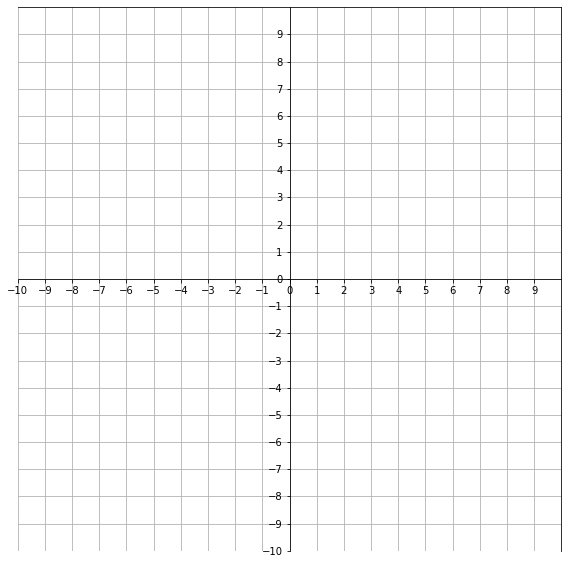

In [184]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-10,10,100)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.set_aspect('equal')
ax.set_xlim(xmin=-10,xmax=10)
ax.set_ylim(ymin=-10,ymax=10)
ax.set_xticks(np.arange(-10,10,1))
ax.set_yticks(np.arange(-10,10,1))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.grid()

e1 = 2*N.i + 
#ax.axhline(0)
#ax.axvline(0)
